
SUPERVISED LEARNING - LINEAR REGRESSION

Synthetic Advertising vs. Sales Data (First 5 rows):
   advertising       sales
0    21.854305  272.162047
1    47.782144  702.543609
2    37.939727  499.969041
3    31.939632  395.330356
4    12.020839  142.784800


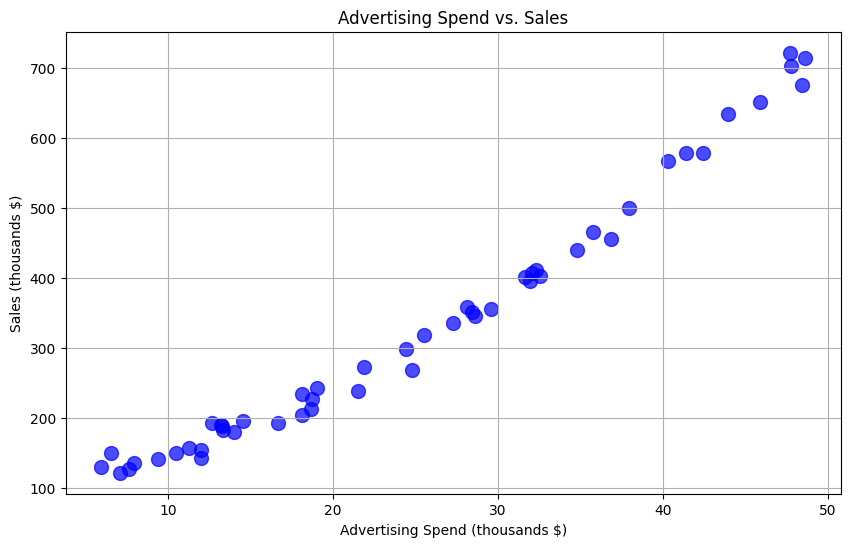


--------------------------------------------------
2.1: Linear Regression
--------------------------------------------------

Model coefficients:
Intercept (b0): -10.37
Slope (b1): 13.93

Training set metrics:
Mean Squared Error (MSE): 1145.98
Root Mean Squared Error (RMSE): 33.85
Mean Absolute Error (MAE): 29.82
R² Score: 0.97

Test set metrics:
Mean Squared Error (MSE): 1016.10
Root Mean Squared Error (RMSE): 31.88
Mean Absolute Error (MAE): 26.21
R² Score: 0.95


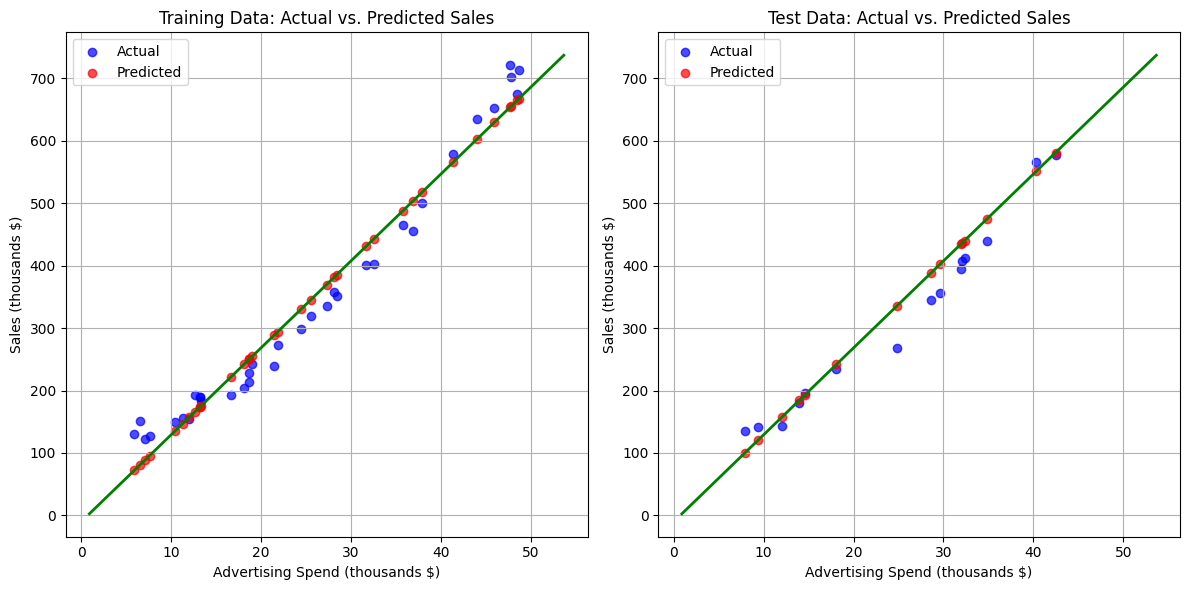

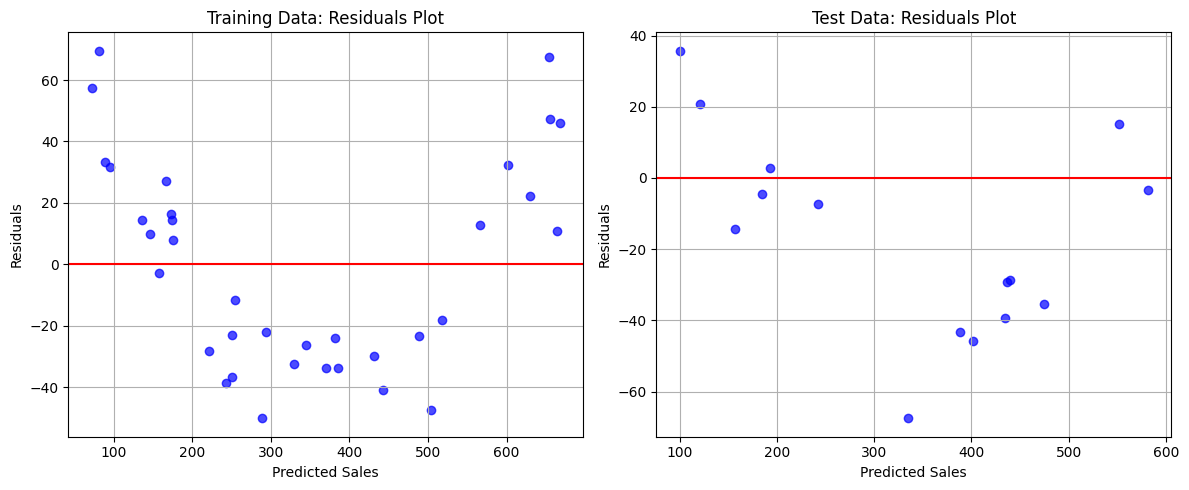


For an advertising spend of $ 35,000, the predicted sales are $ 477,000
Calculation: -10.37 + 13.93 * 35.0 = 477.20


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("\n" + "=" * 50)
print("SUPERVISED LEARNING - LINEAR REGRESSION")
print("=" * 50)

# Generate synthetic advertising/sales data
n_samples = 50

# Advertising spend (in thousands of dollars)
advertising = np.random.uniform(5, 50, n_samples)

# Sales (in thousands of dollars) with some non-linearity and noise
base_sales = 100  # base sales with no advertising
sales = base_sales + 3 * advertising + 0.2 * advertising**2 + np.random.normal(0, 15, n_samples)

# Create a DataFrame
ad_sales_data = pd.DataFrame({
    'advertising': advertising,
    'sales': sales
})

# Display the first few rows
print("\nSynthetic Advertising vs. Sales Data (First 5 rows):")
print(ad_sales_data.head())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(ad_sales_data['advertising'], ad_sales_data['sales'], color='blue', s=100, alpha=0.7)
plt.title('Advertising Spend vs. Sales')
plt.xlabel('Advertising Spend (thousands $)')
plt.ylabel('Sales (thousands $)')
plt.grid(True)
plt.show()

print("\n" + "-" * 50)
print("2.1: Linear Regression")
print("-" * 50)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_ad_spend():
    """
    Gets an amount of ad_spend from the user
    """
    spend = float(input("Enter Ad Spend (in thousands) to Get Projected Sales: $ "))
    return spend

def linear_regression_example(ad_spend):
    """
    Demonstrates linear regression for predicting sales based on advertising spend.

    Linear regression models the relationship between variables by fitting a linear equation
    to the observed data.
    """
    # Split the data into features (X) and target (y)
    X = ad_sales_data[['advertising']]
    y = ad_sales_data['sales']

    # Split into training and testing sets (70% train, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Print the model coefficients
    print(f"\nModel coefficients:")
    print(f"Intercept (b0): {model.intercept_:.2f}")
    print(f"Slope (b1): {model.coef_[0]:.2f}")

    # Make predictions on both training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nTraining set metrics:")
    print(f"Mean Squared Error (MSE): {train_mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
    print(f"R² Score: {train_r2:.2f}")

    print("\nTest set metrics:")
    print(f"Mean Squared Error (MSE): {test_mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
    print(f"R² Score: {test_r2:.2f}")

    # Visualize the regression line and predictions
    plt.figure(figsize=(12, 6))

    # Plot training data and predictions
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.7)
    plt.scatter(X_train, y_train_pred, color='red', label='Predicted', alpha=0.7)

    # Plot the regression line
    x_line = np.array([X['advertising'].min() - 5, X['advertising'].max() + 5])
    y_line = model.intercept_ + model.coef_[0] * x_line
    plt.plot(x_line, y_line, 'g-', linewidth=2)

    plt.title('Training Data: Actual vs. Predicted Sales')
    plt.xlabel('Advertising Spend (thousands $)')
    plt.ylabel('Sales (thousands $)')
    plt.grid(True)
    plt.legend()

    # Plot test data and predictions
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.7)
    plt.scatter(X_test, y_test_pred, color='red', label='Predicted', alpha=0.7)
    plt.plot(x_line, y_line, 'g-', linewidth=2)

    plt.title('Test Data: Actual vs. Predicted Sales')
    plt.xlabel('Advertising Spend (thousands $)')
    plt.ylabel('Sales (thousands $)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Visualize residuals
    plt.figure(figsize=(12, 5))

    # Training data residuals
    plt.subplot(1, 2, 1)
    train_residuals = y_train - y_train_pred
    plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='-')
    plt.title('Training Data: Residuals Plot')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.grid(True)

    # Test data residuals
    plt.subplot(1, 2, 2)
    test_residuals = y_test - y_test_pred
    plt.scatter(y_test_pred, test_residuals, color='blue', alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='-')
    plt.title('Test Data: Residuals Plot')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Make a sample prediction
    # ad_spend = 30  # $30,000 in advertising
    predicted_sales = model.predict([[ad_spend]])[0]
    print(f"\nFor an advertising spend of $ {ad_spend:.0f},000, the predicted sales are $ {predicted_sales:.0f},000")
    print(f"Calculation: {model.intercept_:.2f} + {model.coef_[0]:.2f} * {ad_spend} = {model.intercept_ + model.coef_[0] * ad_spend:.2f}")

# Run the example
linear_regression_example(get_ad_spend())
